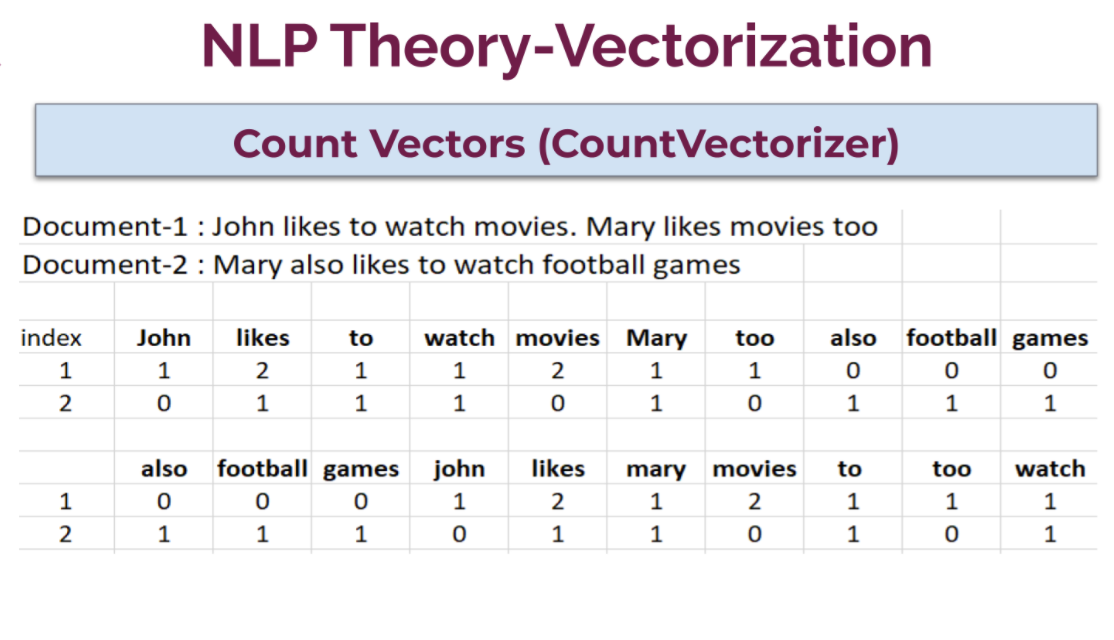

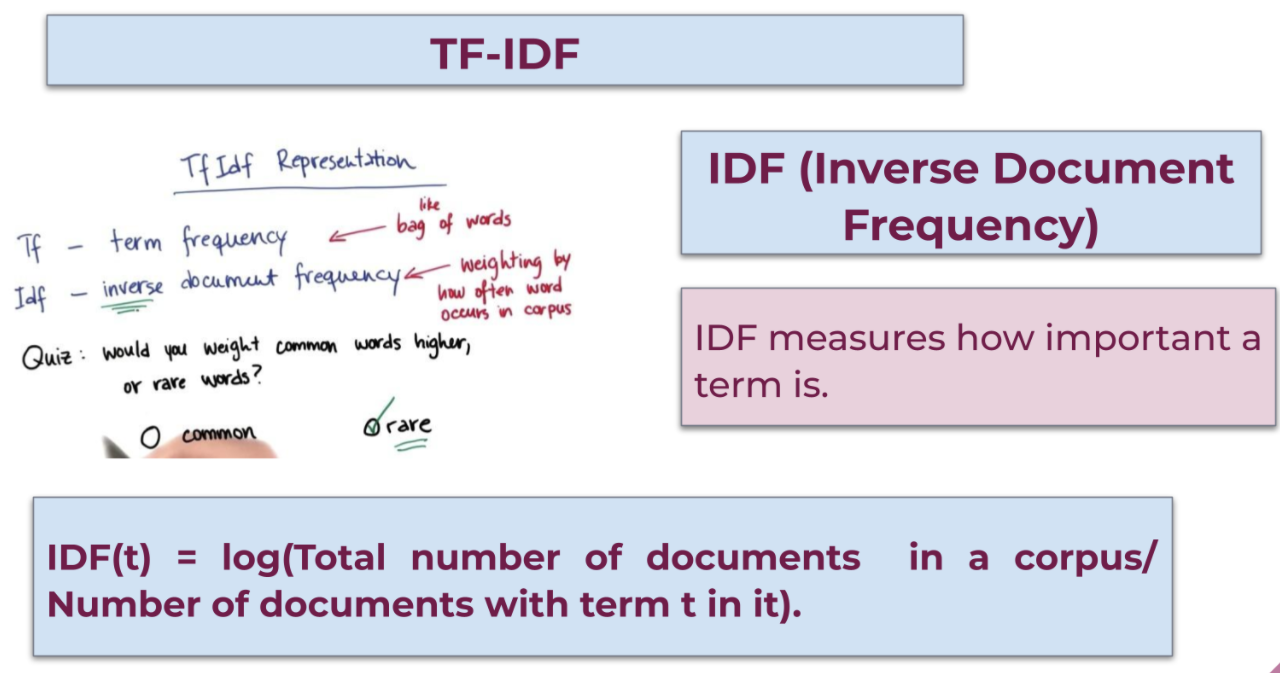

## Install and Import

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
# !pip install nltk

## Tokenization

In [25]:
from nltk.corpus import stopwords

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hüseyin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
sample_text= "Oh man, this is pretty cool. We will do more such things. don't, isn't, aren't, couldn't"

In [28]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [29]:
sentence_token = sent_tokenize(sample_text.lower())
sentence_token

['oh man, this is pretty cool.',
 'we will do more such things.',
 "don't, isn't, aren't, couldn't"]

In [30]:
word_token = word_tokenize(sample_text.lower())
word_token

['oh',
 'man',
 ',',
 'this',
 'is',
 'pretty',
 'cool',
 '.',
 'we',
 'will',
 'do',
 'more',
 'such',
 'things',
 '.',
 'do',
 "n't",
 ',',
 'is',
 "n't",
 ',',
 'are',
 "n't",
 ',',
 'could',
 "n't"]

## Removing Punctuation and Numbers

In [31]:
tokens_without_punc = [w for w in word_token if w.isalpha()] # .isalnum() for number and object
tokens_without_punc

# alfabetik olan tokenları tutarak noktalama işaretlerinin tamamını dışarda bıraktık.

['oh',
 'man',
 'this',
 'is',
 'pretty',
 'cool',
 'we',
 'will',
 'do',
 'more',
 'such',
 'things',
 'do',
 'is',
 'are',
 'could']

## Removing Stopwords

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hüseyin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
from nltk.corpus import stopwords

In [38]:
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
tokens_without_punc

['oh',
 'man',
 'this',
 'is',
 'pretty',
 'cool',
 'we',
 'will',
 'do',
 'more',
 'such',
 'things',
 'do',
 'is',
 'are',
 'could']

In [40]:
token_without_sw = [t for t in tokens_without_punc if t not in stop_words] # if you make a sentiment analysis , you can remove 
                                                                          # negative auxiliary verb
token_without_sw

# burada da stopwords leri dışarda bırakmış olduk.

['oh', 'man', 'pretty', 'cool', 'things', 'could']

In [ ]:
# [i for i in stop_words if "n't" in i]

## Lemmatization

In [56]:
from nltk.stem import WordNetLemmatizer

In [59]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hüseyin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
WordNetLemmatizer().lemmatize("children")

# sondaki ren ekinin çoğul eki olduğunu anladı ve anlam değişmeyeceği için onu atıp kelimenin köküne indi. 

'child'

In [43]:
lem = [WordNetLemmatizer().lemmatize(t) for t in token_without_sw]

In [44]:
lem

['oh', 'man', 'pretty', 'cool', 'thing', 'could']

## Stemming

In [50]:
from nltk.stem import PorterStemmer

In [51]:
PorterStemmer().stem("driving")

'drive'

In [58]:
WordNetLemmatizer().lemmatize("driving")

# stem driving'i drive'a çevirirken
# lemmatize driving olarak bırakıyor.

'driving'

In [52]:
stem = [PorterStemmer().stem(t) for t in token_without_sw]

In [53]:
stem

['oh', 'man', 'pretti', 'cool', 'thing', 'could']

## Joining

In [46]:
" ".join(lem)

'oh man pretty cool thing could'

## Cleaning Function - NOT for sentiment analysis

In [60]:
# sadece classification yapacaksan bu fonksiyonu kullan.

#yukarda tek tek incelenen kodları bir fonksiyonda topladık.

def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower()) 
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [48]:
pd.Series(sample_text).apply(cleaning)

# cleaning fonksiyonunu uygulayabilmem için sample_text i series e çeviriyoruz.

<IPython.core.display.Javascript object>

0    oh man pretty cool thing could
dtype: object

## Cleaning Function - for sentiment analysis

In [61]:
sample_text

"Oh man, this is pretty cool. We will do more such things. don't, isn't, aren't, couldn't"

In [49]:
import re
# \w typically matches [A-Za-z0-9_]  (\w ifadesi [A-Za-z0-9_] ifadesinin tamamını kapsıyor)


s = re.sub('[^\w\s]','',sample_text)   # \s --> boşluk. 
word = word_tokenize(s)
word 

# [^\w\s] --> [A-Za-z0-9_] ve boşluk haricinde kalan herşeyi temizle, yani geriye işaretler kalıyor atılacak. 
# ( ^ --> haricinde demek)

# olumsuz yardımcı fiillerin hala dokümanın içinde olduğuna dikkat!

['Oh',
 'man',
 'this',
 'is',
 'pretty',
 'cool',
 'We',
 'will',
 'do',
 'more',
 'such',
 'things',
 'dont',
 'isnt',
 'arent',
 'couldnt']

In [62]:
# hem classification hem duygu analizinde bunu kullanabilirsin.
# olumsuz yardımcı fiiler korunuyor.

def cleaning_fsa(data):
    
    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','',sample_text)    # noktalama işaretlerini dolayısıyla üstten virgülleri öncelikle kaldırıyoruz.
                                            # dolayısıyla bu kelimeleri stop_word olarak görmeyeceği için stop_word satırında
                                            # bu kelimeler elenmemiş olacak.
    #2. Tokenize                            
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)



In [63]:
pd.Series(sample_text).apply(cleaning_fsa)

# üstten virgülü kaldırmış olmasaydık stopword ler arasında olan aren't ı veya couldn't ı atmış olacaktı. 
# o yüzden yukardaki fonksiyonda ( text = re.sub('[^\w\s]','',sample_text) ) kodu ile üstten virgülü kaldırdık.

<IPython.core.display.Javascript object>

0    oh man pretty cool thing dont isnt arent couldnt
dtype: object

## Part of Speech Tagging

In [66]:
from nltk import pos_tag

In [102]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hüseyin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [103]:
text = "Steven Paul Jobs was an American business magnate, industrial designer, investor, and media proprietor. He was the chairman, chief executive officer (CEO), and co-founder of Apple Inc.; the chairman and majority shareholder of Pixar; a member of The Walt Disney Company's board of directors following its acquisition of Pixar; and the founder, chairman, and CEO of NeXT. "

In [104]:
tokens = word_tokenize(text)

In [105]:
tagg = pos_tag(tokens)
tagg

[('Steven', 'NNP'),
 ('Paul', 'NNP'),
 ('Jobs', 'NNP'),
 ('was', 'VBD'),
 ('an', 'DT'),
 ('American', 'JJ'),
 ('business', 'NN'),
 ('magnate', 'NN'),
 (',', ','),
 ('industrial', 'JJ'),
 ('designer', 'NN'),
 (',', ','),
 ('investor', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('media', 'NNS'),
 ('proprietor', 'NN'),
 ('.', '.'),
 ('He', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('chairman', 'NN'),
 (',', ','),
 ('chief', 'JJ'),
 ('executive', 'NN'),
 ('officer', 'NN'),
 ('(', '('),
 ('CEO', 'NNP'),
 (')', ')'),
 (',', ','),
 ('and', 'CC'),
 ('co-founder', 'NN'),
 ('of', 'IN'),
 ('Apple', 'NNP'),
 ('Inc.', 'NNP'),
 (';', ':'),
 ('the', 'DT'),
 ('chairman', 'NN'),
 ('and', 'CC'),
 ('majority', 'NN'),
 ('shareholder', 'NN'),
 ('of', 'IN'),
 ('Pixar', 'NNP'),
 (';', ':'),
 ('a', 'DT'),
 ('member', 'NN'),
 ('of', 'IN'),
 ('The', 'DT'),
 ('Walt', 'NNP'),
 ('Disney', 'NNP'),
 ('Company', 'NNP'),
 ("'s", 'POS'),
 ('board', 'NN'),
 ('of', 'IN'),
 ('directors', 'NNS'),
 ('following', 'VBG'),
 ('its', 

## Named Entity Recognition

In [106]:
from nltk import ne_chunk

In [107]:
ner = ne_chunk(tagg)
ner

LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mchunkers/maxent_ne_chunker/english_ace_multiclass.pickle[0m

  Searched in:
    - 'C:\\Users\\hüseyin/nltk_data'
    - 'c:\\users\\hüseyin\\appdata\\local\\programs\\python\\python37\\nltk_data'
    - 'c:\\users\\hüseyin\\appdata\\local\\programs\\python\\python37\\share\\nltk_data'
    - 'c:\\users\\hüseyin\\appdata\\local\\programs\\python\\python37\\lib\\nltk_data'
    - 'C:\\Users\\hüseyin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [36]:
ner.draw()

## CountVectorization and TF-IDF Vectorization

In [72]:
df = pd.read_csv("airline_tweets.csv")

<IPython.core.display.Javascript object>

In [73]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [39]:
df = df[['airline_sentiment','text']]
df

# NLP de biz "text" kısmıyla ve "label" kısmıyla ilgileniyoruz!!

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [108]:
import pandas as pd
import numpy as np

In [109]:
df = df.iloc[:8, :]
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)


In [76]:
df2 = df.copy()

In [77]:
df2["text"] = df2["text"].apply(cleaning)

In [78]:
df2

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica dhepburn said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus added commercial experience...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica today must mean need take anothe...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica really aggressive blast obnoxiou...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,virginamerica seriously would pay flight seat ...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,virginamerica yes nearly every time fly vx ear...,NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,virginamerica really missed prime opportunity ...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)


## CountVectorization

In [79]:
X = df2["text"]
y = df2["airline_sentiment"]

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y, random_state = 42)

# y'ler imbalans data ise stratify yapıyoruz.

# yukarda datadan sadece 8 satır aldığımız için test_size ı 0.5 gibi büyük bir değer olarak belirledik.
# normal çözümlerde biz yine test_size a 0.1 veya 0.2 gibi değerler vereceğiz

In [115]:
X_train

6    virginamerica yes nearly every time fly vx ear...
0                          virginamerica dhepburn said
2    virginamerica today must mean need take anothe...
4                   virginamerica really big bad thing
Name: text, dtype: object

In [116]:
X_test

3    virginamerica really aggressive blast obnoxiou...
5    virginamerica seriously would pay flight seat ...
1    virginamerica plus added commercial experience...
7    virginamerica really missed prime opportunity ...
Name: text, dtype: object

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# fit deyince train setindeki unique olan bütün tokenleri buluyor, tespit ediyor. 
# transform deyince de onları sayıyor yani hangi kelimeden kaçar tane var tespit ediyor..

In [85]:
vectorizer.get_feature_names()

['another',
 'away',
 'bad',
 'big',
 'dhepburn',
 'ear',
 'every',
 'fly',
 'go',
 'mean',
 'must',
 'nearly',
 'need',
 'really',
 'said',
 'take',
 'thing',
 'time',
 'today',
 'trip',
 'virginamerica',
 'vx',
 'worm',
 'yes']

In [111]:
X_train_count

<4x24 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [84]:
X_train_count.toarray()

# tüm dokümanları array şekline getiriyoruz. 

array([[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0]], dtype=int64)

In [113]:
pd.set_option('display.max_columns', 50)

In [114]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

# data olarak X_train_count.toarray() o al, column olarak vectorizer içindeki tüm featureların isimlerini al. 

,another,away,bad,big,dhepburn,ear,every,fly,go,mean,must,nearly,need,really,said,take,thing,time,today,trip,virginamerica,vx,worm,yes
0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,1,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [88]:
X_train[6]

'virginamerica yes nearly every time fly vx ear worm go away'

In [55]:
vectorizer.vocabulary_

# her kelimeden kaçar tane geçtiğini görebiliyoruz.

{'virginamerica': 20,
 'yes': 23,
 'nearly': 11,
 'every': 6,
 'time': 17,
 'fly': 7,
 'vx': 21,
 'ear': 5,
 'worm': 22,
 'go': 8,
 'away': 1,
 'dhepburn': 4,
 'said': 14,
 'today': 18,
 'must': 10,
 'mean': 9,
 'need': 12,
 'take': 15,
 'another': 0,
 'trip': 19,
 'really': 13,
 'big': 3,
 'bad': 2,
 'thing': 16}

## TF-IDF

sklearn TD-IDF
https://towardsdatascience.com/how-sklearns-tf-idf-is-different-from-the-standard-tf-idf-275fa582e73d

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# fit burada tüm tokenleri sayıyor. sonra da teker teker öncelikle TF fonksiyonunu uyguluyor. 
#  sonra IDF bulmak için bu kelimeler tüm dokümanlarda geçmiş mi geçmemiş mi onları sayıyor. 
# transform deyince de TF-IDF katsayısını hesaplayıp buluyor.

In [93]:
tf_idf_vectorizer.get_feature_names()

['another',
 'away',
 'bad',
 'big',
 'dhepburn',
 'ear',
 'every',
 'fly',
 'go',
 'mean',
 'must',
 'nearly',
 'need',
 'really',
 'said',
 'take',
 'thing',
 'time',
 'today',
 'trip',
 'virginamerica',
 'vx',
 'worm',
 'yes']

In [94]:
X_train_tf_idf.toarray()

array([[0.        , 0.31200802, 0.        , 0.        , 0.        ,
        0.31200802, 0.31200802, 0.31200802, 0.31200802, 0.        ,
        0.        , 0.31200802, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.31200802, 0.        , 0.        ,
        0.16281873, 0.31200802, 0.31200802, 0.31200802],
       [0.        , 0.        , 0.        , 0.        , 0.66338461,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.66338461,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34618161, 0.        , 0.        , 0.        ],
       [0.37082034, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.37082034,
        0.37082034, 0.        , 0.37082034, 0.        , 0.        ,
        0.37082034, 0.        , 0.        , 0.37082034, 0.37082034,
        0.19350944, 0.        , 0.        , 0.        ],
       [0.   

In [95]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,another,away,bad,big,dhepburn,ear,every,fly,go,mean,must,nearly,need,really,said,take,thing,time,today,trip,virginamerica,vx,worm,yes
0,0.00000,0.312008,0.000000,0.000000,0.000000,0.312008,0.312008,0.312008,0.312008,0.00000,0.00000,0.312008,0.00000,0.000000,0.000000,0.00000,0.000000,0.312008,0.00000,0.00000,0.162819,0.312008,0.312008,0.312008
1,0.00000,0.000000,0.000000,0.000000,0.663385,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.663385,0.00000,0.000000,0.000000,0.00000,0.00000,0.346182,0.000000,0.000000,0.000000
2,0.37082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.37082,0.37082,0.000000,0.37082,0.000000,0.000000,0.37082,0.000000,0.000000,0.37082,0.37082,0.193509,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.483803,0.483803,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.483803,0.000000,0.00000,0.483803,0.000000,0.00000,0.00000,0.252468,0.000000,0.000000,0.000000


In [96]:
X_train[6]

'virginamerica yes nearly every time fly vx ear worm go away'

In [99]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names()).loc[1].sort_values(ascending=False)

# virginamerica tüm dokümanlarda geçtiği için doğal olarak onun ağırlığını azaltmış. en hafifi o olmuş.

dhepburn         0.663385
said             0.663385
virginamerica    0.346182
another          0.000000
really           0.000000
worm             0.000000
vx               0.000000
trip             0.000000
today            0.000000
time             0.000000
thing            0.000000
take             0.000000
need             0.000000
away             0.000000
nearly           0.000000
must             0.000000
mean             0.000000
go               0.000000
fly              0.000000
every            0.000000
ear              0.000000
big              0.000000
bad              0.000000
yes              0.000000
Name: 1, dtype: float64

In [100]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names()).loc[0].sort_values(ascending=False)

# loc[0] da da virginamerica nın en düşük ağırlığa sahip olduğunu görüyoruz. 

yes              0.312008
worm             0.312008
vx               0.312008
ear              0.312008
every            0.312008
fly              0.312008
go               0.312008
nearly           0.312008
away             0.312008
time             0.312008
virginamerica    0.162819
take             0.000000
trip             0.000000
today            0.000000
thing            0.000000
another          0.000000
said             0.000000
really           0.000000
must             0.000000
mean             0.000000
dhepburn         0.000000
big              0.000000
bad              0.000000
need             0.000000
Name: 0, dtype: float64